In [1]:
'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

In [10]:
'''Import basic modules.'''
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

In [7]:
'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 

'''Plotly visualization .'''

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [8]:
'''Convert whole dataset'''
data=pd.read_csv("train.csv")

In [11]:
data.shape

(1460, 81)

In [20]:
'''Spliting data into train and test before initiating the eda in 70:30 split'''
train, test = train_test_split(data, test_size=0.2, random_state=25)

In [21]:
print(train.shape)
print(test.shape)

(1168, 81)
(292, 81)


In [24]:
'''Train and test data at a glance.'''
bold('**Preview of Train Data:**')
display(train.head(3))


**Preview of Train Data:**

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
955    956          90       RH         82.0     7136   Pave   NaN      IR1   
1278  1279          60       RL         75.0     9473   Pave   NaN      Reg   
667    668          20       RL         65.0     8125   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
955          HLS    AllPub  ...        0    NaN   NaN         NaN       0   
1278         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
667          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
955       8   2007        WD         Normal     145000  
1278      3   2008        WD         Normal     237000  
667      10   2008        WD         Normal     193500  

[3 rows x 81 columns]

In [25]:
'''Have a look of our variable names'''
bold('**Name of our variables (1st 20):**')
display(train.columns[:20].values)

**Name of our variables (1st 20):**

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt'], dtype=object)

In [26]:
"""Let's first inspect how many kinds of data types that we have to deal with."""
merged = pd.concat([train, test], axis = 0, sort = True)
bold('**Data types of our variables:**')
display(merged.dtypes.value_counts())


**Data types of our variables:**

object     43
int64      35
float64     3
dtype: int64

In [27]:
'''Extract numerical variables first.'''
num_merged = merged.select_dtypes(include = ['int64', 'float64'])
bold('**Numerical variables:**')
display(num_merged.head(3))
bold('**Name of numerical variables:**')
display(num_merged.columns.values)

**Numerical variables:**

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
955        979       979          0             4         484           0   
1278      1128       903          0             3         804           0   
667       1679         0          0             3        1138           0   

      BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  OverallQual  \
955              0             0        495              0  ...            6   
1278             1             0        324              0  ...            8   
667              1             0        270              0  ...            6   

      PoolArea  SalePrice  ScreenPorch  TotRmsAbvGrd  TotalBsmtSF  WoodDeckSF  \
955          0     145000            0             8          979           0   
1278         0     237000            0             7         1128           0   
667          0     193500            0             7         1408         224   

      YearBuilt  YearRemodAdd  YrSold  
955        1946          1950    2007  
1278       2002          2002    2008  
667        1994          1998    2008  

[3 rows x 38 columns]

**Name of numerical variables:**

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'], dtype=object)

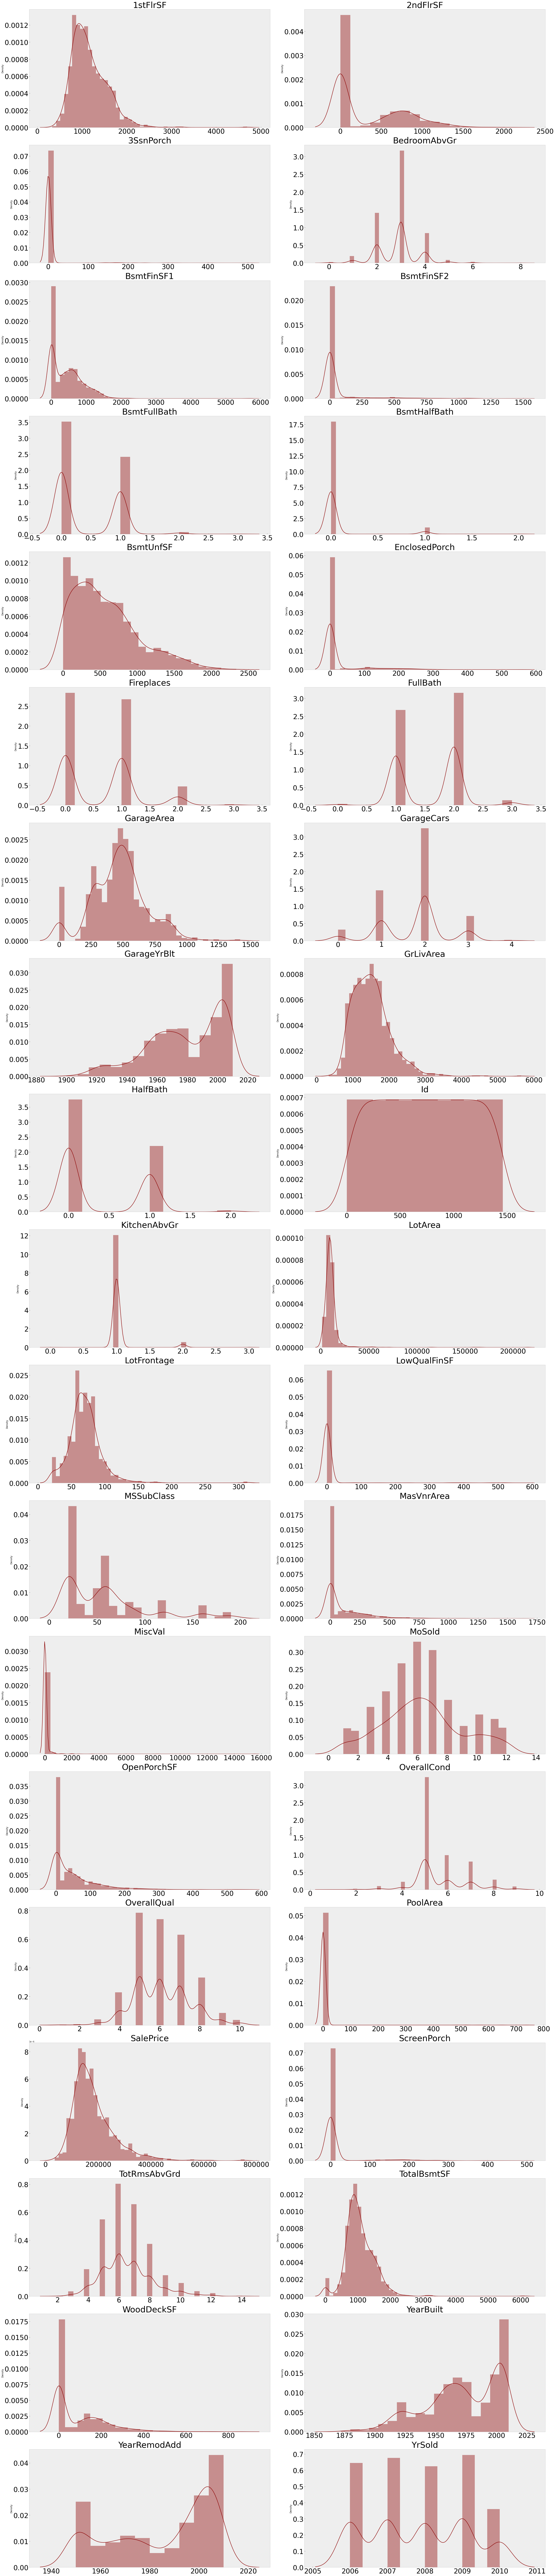

In [28]:
'''Plot histogram of numerical variables to validate pandas intuition.'''
fig, axes = plt.subplots(nrows = 19, ncols = 2, figsize = (40, 200))
for ax, column in zip(axes.flatten(), num_merged.columns):
    sns.distplot(num_merged[column].dropna(), ax = ax, color = 'darkred')
    ax.set_title(column, fontsize = 43)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
    ax.set_xlabel('')
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

In [30]:
'''Convert MSSubClass, OverallQual, OverallCond, MoSold, YrSold into categorical variables.'''
merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')

In [31]:
'''Check out the data types after correction'''
bold('**Data types after correction:**')
display(merged.dtypes.value_counts())

**Data types after correction:**

object     48
int64      30
float64     3
dtype: int64

In [32]:
'''Extract train and test data from the combined data set.'''
df_train = merged.iloc[:1460, :].drop(columns = ['Id'], axis = 1)
df_test = merged.iloc[1460:, :].drop(columns = ['Id', 'SalePrice'], axis = 1) # SalePrice due to concatenation

In [34]:
'''Function to plot bar chart'''
def bar_plot(x, y, title, yaxis, c_scale):
    trace = go.Bar(
    x = x,
    y = y,
    marker = dict(color = y, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

'''Function to plot scatter plot'''
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers',
    marker = dict(color = y, size = size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)    
    
'''Function to plot histogram'''
def plot_histogram(x, title, yaxis, color):
    trace = go.Histogram(x = x,
                        marker = dict(color = color))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

In [35]:
'''Sactter plot of GrLivArea vs SalePrice.'''
scatter_plot(df_train.GrLivArea, df_train.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

In [36]:
'''Drop observations where GrLivArea is greater than 4000 sq.ft'''
df_train.drop(df_train[df_train.GrLivArea>4000].index, inplace = True)
df_train.reset_index(drop = True, inplace = True)

In [37]:
'''Plot the sactter plot again of GrLivArea vs SalePrice to see if outliers are gone.'''
scatter_plot(df_train.GrLivArea, df_train.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

In [38]:
'''Separate our target variable first.'''
y_train = df_train.SalePrice

'''Drop SalePrice from train data.'''
df_train.drop('SalePrice', axis = 1, inplace = True)

'''Now combine train and test data frame together.'''
df_merged = pd.concat([df_train, df_test], axis = 0)

In [39]:
'''Columns with missing observations.'''
missing_columns = df_merged.columns[df_merged.isnull().any()].values
'''Number of columns with missing observations.'''
total_columns = np.count_nonzero(df_merged.isna().sum())
print('We have ' , total_columns ,  'features with missing values and those features (with missing values) are: \n\n' , missing_columns)

We have  19 features with missing values and those features (with missing values) are: 

 ['Alley' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'BsmtQual' 'Electrical' 'Fence' 'FireplaceQu' 'GarageCond' 'GarageFinish'
 'GarageQual' 'GarageType' 'GarageYrBlt' 'LotFrontage' 'MasVnrArea'
 'MasVnrType' 'MiscFeature' 'PoolQC']


In [40]:
'''Get and plot only the features (with missing values) and their corresponding missing values.'''
missing_columns = len(df_merged) - df_merged.loc[:, np.sum(df_merged.isnull())>0].count()
x = missing_columns.index
y = missing_columns
title = 'Variables with Missing Values'
scatter_plot(x, y, title, 'Features Having Missing Observations','Missing Values', 30, 'Picnic')

In [41]:
'''Impute by None where NaN means something.'''
to_impute_by_none = df_merged.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]
for i in to_impute_by_none.columns:
    df_merged[i].fillna('None', inplace = True)

In [42]:
'''These are categorical variables and will be imputed by mode.'''
to_impute_by_mode = df_merged.loc[:, ['Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional', 'SaleType']]
for i in to_impute_by_mode.columns:
    df_merged[i].fillna(df_merged[i].mode()[0], inplace = True)

In [43]:
'''The following variables are either discrete numerical or continuous numerical variables.So the will be imputed by median.'''
to_impute_by_median = df_merged.loc[:, ['BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']]
for i in to_impute_by_median.columns:
    df_merged[i].fillna(df_merged[i].median(), inplace = True)

In [44]:
'''Columns remaining to be imputed'''
display(df_merged.columns[df_merged.isna().any()].values)

array(['LotFrontage'], dtype=object)

In [45]:
"""Let's create a function to find the variables correlated with LotFrontage"""
def corr(correlation, variable):
    from sklearn.preprocessing import LabelEncoder # Convert categorical variables into numerical
    correlation = correlation.agg(LabelEncoder().fit_transform)
    correlation['LotFrontage'] = variable
    corr = correlation.corr()
    display(corr['LotFrontage'].sort_values(ascending = False)[:5])
    display(corr['LotFrontage'].sort_values(ascending = False)[-5:])

In [46]:
'''Correlation of LotFrontage with categorical data.'''
bold("**LotFrontage's correlation with categorical data:**")
corr(df_merged.select_dtypes(include = ['object']), df_merged.LotFrontage)

**LotFrontage's correlation with categorical data:**

LotFrontage    1.000000
OverallQual    0.225994
RoofStyle      0.153455
Exterior2nd    0.117478
RoofMatl       0.110590
Name: LotFrontage, dtype: float64

LotConfig    -0.194934
GarageType   -0.282040
MSSubClass   -0.359662
BldgType     -0.466858
Utilities          NaN
Name: LotFrontage, dtype: float64

In [47]:
'''Impute LotFrontage with the median of highest correlated column(i.e., BldgType)'''
df_merged.LotFrontage = df_merged.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [48]:
'''Is there any missing values left untreated??'''
print('Missing variables left untreated: ', df_merged.columns[df_merged.isna().any()].values)

Missing variables left untreated:  []


In [49]:
'''Plot the distribution of SalePrice with skewness.'''
title = 'SalePrice without Transformation (skewness: {:0.4f})'.format(y_train.skew())
plot_histogram(y_train, title, 'Abs Frequency', 'darkred')

In [50]:
'''Plot the distribution of SalePrice removing skewness.'''
y_train = np.log1p(y_train)
title = 'SalePrice after Transformation (skewness: {:0.4f})'.format(y_train.skew())
plot_histogram(y_train, title, 'Abs Frequency', 'green')

In [51]:
'''Now calculate and plot the skewness for rest of the explanetory variables.'''
skew_merged = pd.DataFrame(data = df_merged.select_dtypes(include = ['int64', 'float64']).skew(), columns = ['Skewness'])
skew_merged_sorted = skew_merged.sort_values(ascending = False, by = 'Skewness')
bar_plot(skew_merged_sorted.index, skew_merged_sorted.Skewness, 'Skewness in Explanetory Variables', 'Skewness', 'Bluered')

In [52]:
'''Extract numeric variables merged data.'''
df_merged_num = df_merged.select_dtypes(include = ['int64', 'float64'])

In [53]:
'''Get the index of the data to be transformed'''
bold('**Features to be transformed (skewness>0.75):**')
display(df_merged_num.skew()[df_merged_num.skew()>0.75].index.values) 
# So these are the variables to be transformed.

**Features to be transformed (skewness>0.75):**

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'BsmtUnfSF', 'EnclosedPorch', 'GrLivArea', 'KitchenAbvGr',
       'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'WoodDeckSF'],
      dtype=object)

In [54]:
'''Make the transformation.'''
df_merged_skewed = np.log1p(df_merged_num[df_merged_num.skew()[df_merged_num.skew()>0.75].index])
df_merged_normal = df_merged_num[df_merged_num.skew()[df_merged_num.skew()< 0.75].index] # Normal variables
df_merged_num_all = pd.concat([df_merged_skewed, df_merged_normal], axis = 1)

In [55]:
'''Update numerical variables with transformed variables.'''
df_merged_num.update(df_merged_num_all)

c:\Users\harsh\anaconda3\lib\site-packages\pandas\core\frame.py:6599: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
'''Fit label encoder to find the correlated variables.'''
from sklearn.preprocessing import LabelEncoder
df_corr = pd.concat([df_merged.iloc[0:1456, :], y_train], axis = 1)
df_corr = df_corr.agg(LabelEncoder().fit_transform)
df_corr = df_corr.corr()
bold('**Best 10 Positively Correlated Variables:**')
display(df_corr['SalePrice'].sort_values(ascending = False)[:11]) # Best 10 positively correlated
bold('**Best 10 Negatively Correlated Variables:**')
display(df_corr['SalePrice'].sort_values(ascending = False)[-10:]) # Best 10 negatively correlated

**Best 10 Positively Correlated Variables:**

SalePrice       1.000000
OverallQual     0.819885
GrLivArea       0.737118
GarageCars      0.680034
GarageArea      0.664054
TotalBsmtSF     0.633474
YearBuilt       0.618314
FullBath        0.616308
1stFlrSF        0.599499
YearRemodAdd    0.580152
GarageYrBlt     0.529454
Name: SalePrice, dtype: float64

**Best 10 Negatively Correlated Variables:**

KitchenAbvGr   -0.161072
MSZoning       -0.232167
LotShape       -0.292313
BsmtExposure   -0.303445
HeatingQC      -0.448559
GarageFinish   -0.449363
GarageType     -0.513152
KitchenQual    -0.554800
BsmtQual       -0.598646
ExterQual      -0.611179
Name: SalePrice, dtype: float64

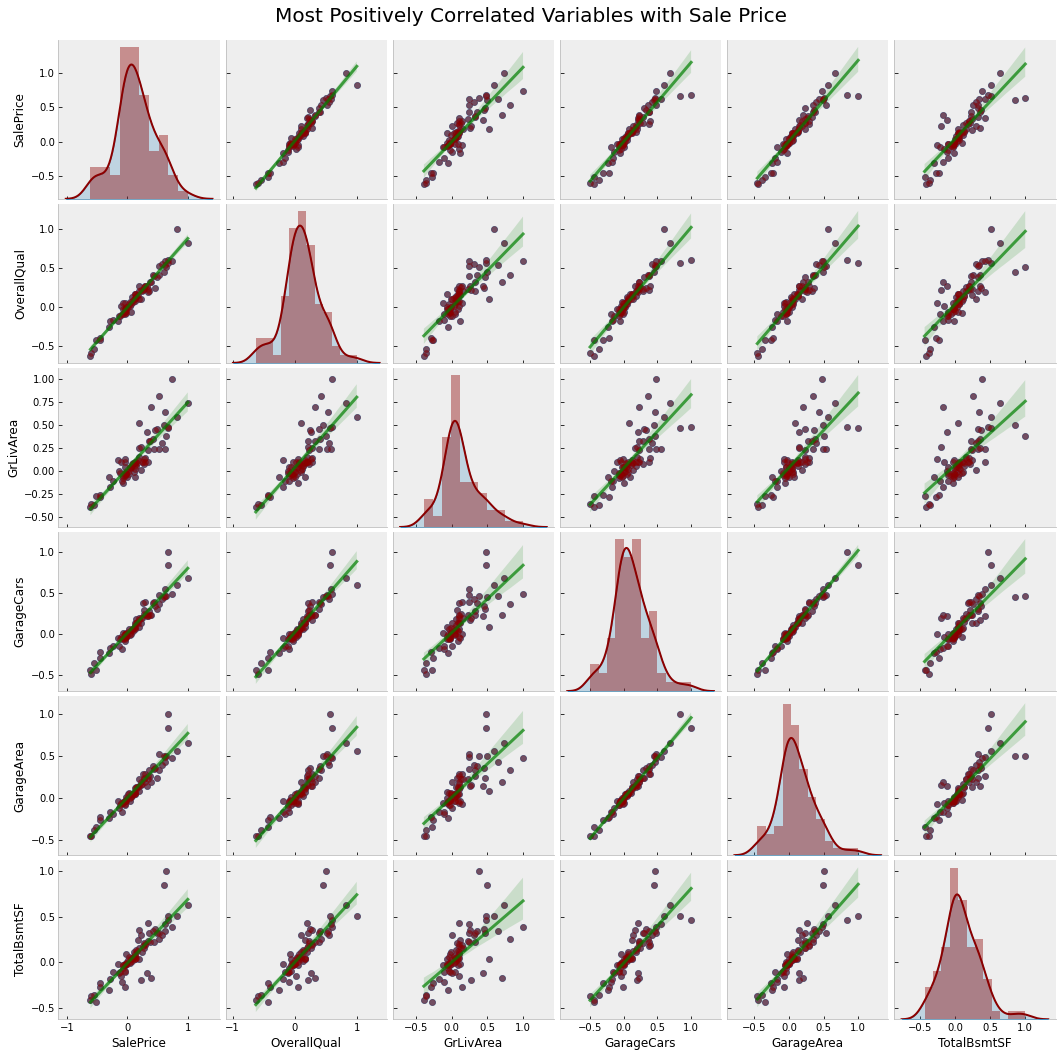

In [57]:
'''We can also create a scatter plot matrix of positively correlated variables (top 5) with SalePrice.'''
corr_positive = df_corr.loc[:, ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]
g = sns.pairplot(corr_positive, kind = 'reg', diag_kind = 'kde', plot_kws = {'line_kws':{'color':'green', 'alpha': 0.7}}) 
g = g.map_diag(sns.distplot, color = 'darkred')
g = g.map_offdiag(plt.scatter, alpha = 0.5, color = 'darkred')
g.fig.suptitle('Most Positively Correlated Variables with Sale Price', fontsize = 20)
plt.subplots_adjust(top = 0.95)

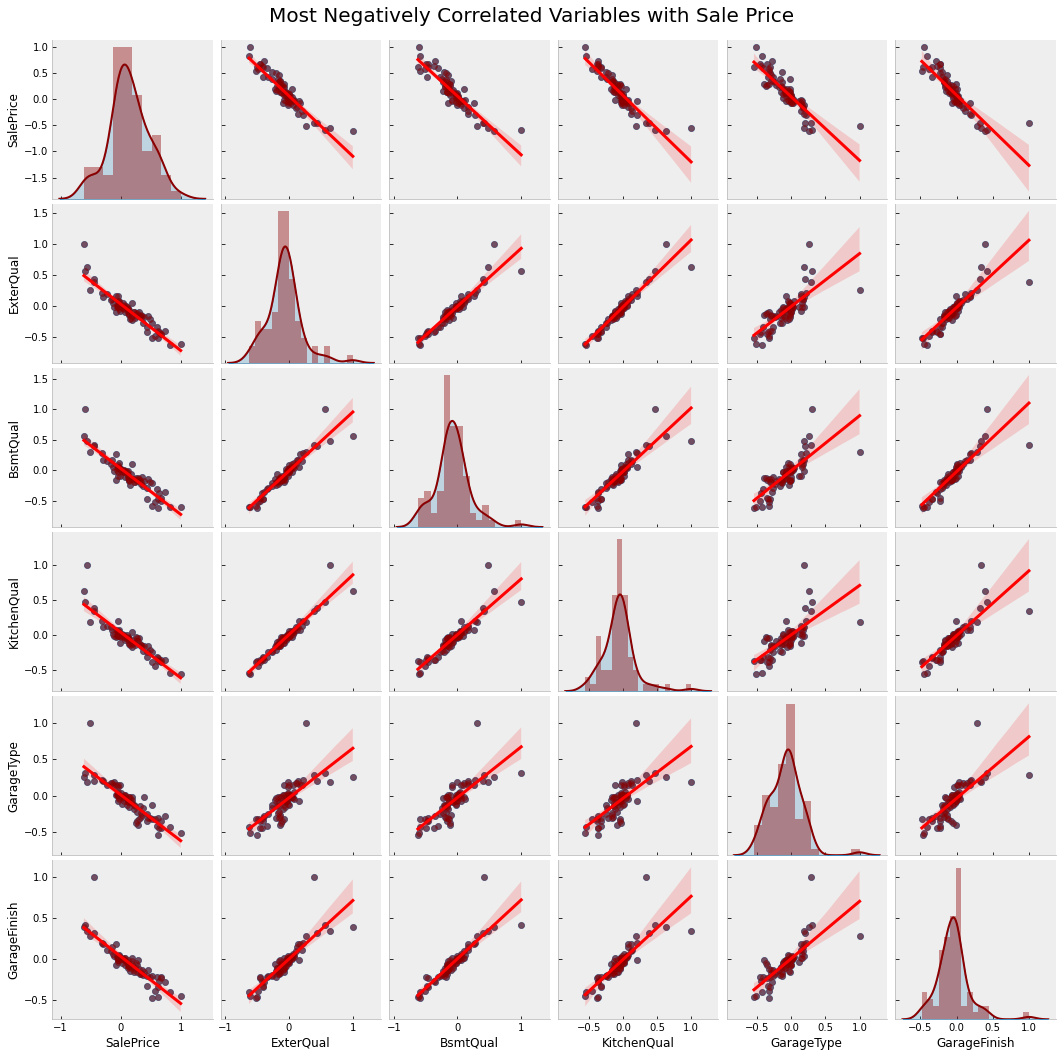

In [58]:
""" In the same way, let's also create a scatter plot matrix of negatively correlated variables (top 5) with SalePrice."""
corr_neg = df_corr.loc[:, ['SalePrice', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageType', 'GarageFinish']]
g = sns.pairplot(corr_neg, kind = 'reg', diag_kind = 'kde', plot_kws = {'line_kws':{'color':'red'}})
g = g.map_diag(sns.distplot, color = 'darkred')
g = g.map_offdiag(plt.scatter, alpha = 0.5, color = 'darkred')
g.fig.suptitle('Most Negatively Correlated Variables with Sale Price', fontsize = 20)
plt.subplots_adjust(top = 0.95)

In [59]:
'''Plot regression plot to see how SalePrice is correlated with numerical variables.'''
corr_num = df_merged.loc[:, ['GrLivArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearRemodAdd', 'GarageYrBlt']]
corr_num = corr_num.iloc[0:1456, :]
for i in corr_num.columns:
    x = corr_num[i]
    y = y_train
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x + intercept

    # Creating the dataset, and generating the plot
    trace0 = go.Scatter(
                  x = x,
                  y = y,
                  mode = 'markers',
                  marker = dict(color = 'red'),
                  name ='Data'
                  )
    
    # Creating regression line
    trace1 = go.Scatter(
                  x = x,
                  y = line,
                  mode='lines',
                  marker = dict(color = 'green'),
                  name='Fit'
                  )

    # Layout for regression plot
    title = '{} vs SalePrice (r: {:0.4f}, p: {})'.format(corr_num[i].name, r_value, p_value)
    layout = go.Layout(
            title = title, yaxis = dict(title = 'SalePrice'))

    data = [trace0, trace1]
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

In [60]:
'''Create boxplots to see the association between categorical and target variables.'''
corr_cat = df_merged.loc[:, ['OverallQual', 'GarageCars', 'FullBath', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageType', 'GarageFinish', 'HeatingQC', 'BsmtExposure', 'LotShape', 'MSZoning', 'KitchenAbvGr']]
corr_cat = corr_cat.iloc[0:1456, :]
for i in corr_cat.columns:
    trace = go.Box(x = corr_cat[i], y = y_train, marker = dict (color = 'magenta'))
    data = [trace]
    layout = go.Layout(title = '{} vs SalePrice'.format(i), yaxis = dict(title = 'SalePrice'))
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

In [61]:
'''Create pivot table to see if mean SalePrice varries across groups of categorical variables.'''
pivot_df = pd.concat([corr_cat, y_train], axis = 1)
for i in corr_cat.columns:
    pivot_table = pivot_df.pivot_table(index = i, values = 'SalePrice', aggfunc = np.mean)
    bar_plot(pivot_table.index, pivot_table.SalePrice, '{} vs Mean SalePrice'.format(i), 'Mean SalePrice', 'Rainbow')

In [62]:
'''Create Feature TotalSF'''
df_merged_num['TotalSF'] = df_merged_num['TotalBsmtSF'] + df_merged_num['1stFlrSF'] + df_merged_num['2ndFlrSF']

<ipython-input-62-441ce9da7f01>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
'''Standarize numeric features with RobustScaler'''
from sklearn.preprocessing import RobustScaler

'''Initialize robust scaler object.'''
robust_scl = RobustScaler()

'''Fit scaler object on train data.'''
robust_scl.fit(df_merged_num)

'''Apply scaler object to both train and test data.'''
df_merged_num_scaled = robust_scl.transform(df_merged_num)

In [64]:
'''Retrive column names'''
df_merged_num_scaled = pd.DataFrame(data = df_merged_num_scaled, columns = df_merged_num.columns, index = df_merged_num.index)
# Pass the index of index df_merged_num, otherwise it will sum up the index.

In [65]:
"""Let's extract categorical variables first and convert them into category."""
df_merged_cat = df_merged.select_dtypes(include = ['object']).astype('category')

"""let's begin the tedious process of label encoding."""
df_merged_cat.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Utilities.replace(to_replace = ['NoSeWa', 'AllPub'], value = [0, 1], inplace = True)
df_merged_cat.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
df_merged_cat.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.GarageQual.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
df_merged_cat.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

In [66]:
'''All the encodeded variables have int64 dtype except OverallQual and OverallCond. So convert them back into int64.'''
df_merged_cat.loc[:, ['OverallQual', 'OverallCond']] = df_merged_cat.loc[:, ['OverallQual', 'OverallCond']].astype('int64')

'''Extract label encoded variables'''
df_merged_label_encoded = df_merged_cat.select_dtypes(include = ['int64'])

In [67]:
'''Now extract the nominal variables for one hot encoding.'''
df_merged_one_hot = df_merged_cat.select_dtypes(include = ['category'])
df_merged_one_hot = pd.get_dummies(df_merged_one_hot)

In [68]:
"""Let's concate one hot encoded and label encoded variables together."""
df_merged_encoded = pd.concat([df_merged_one_hot, df_merged_label_encoded], axis = 1)

'''Finally join processed categorical and numerical variables.'''
df_merged_processed = pd.concat([df_merged_num_scaled, df_merged_encoded], axis = 1)

In [70]:
'''Now retrive train and test data for modelling.'''
df_train_final = df_merged_processed.iloc[0:1456, :]
df_test_final = df_merged_processed.iloc[1456:, :]

'''And we have our target variable as y_train.'''
y_train = y_train

In [71]:
"""Let's look at our final train and test data for modelling."""
bold('**Updated train data for modelling:**')
display(df_train_final.head(3))
bold('**Updated test data for modelling:**')
display(df_test_final.head(3))

**Updated train data for modelling:**

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0 -0.228291  1.044887        0.0           1.0    0.145789         0.0   
1  0.083520  1.032641        0.0           0.0    0.598726         0.0   
2  0.959152  0.000000        0.0           0.0    1.071479         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  HeatingQC  \
0           0.0           0.0   0.027927            0.0  ...          2   
1           1.0           0.0  -0.300706            0.0  ...          4   
2           1.0           0.0  -0.441958            0.0  ...          4   

   KitchenQual  LandContour  LandSlope  LotShape  OverallCond  OverallQual  \
0            1            2          2         2            6            6   
1            2            3          2         3            5            8   
2            2            3          2         3            5            6   

   PavedDrive  PoolQC  Utilities  
0           2       0          1  
1           2       0          1  
2           2       0          1  

[3 rows x 247 columns]

**Updated test data for modelling:**

Empty DataFrame
Columns: [1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MasVnrArea, MiscVal, OpenPorchSF, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, TotalSF, Alley_Grvl, Alley_None, Alley_Pave, BldgType_1Fam, BldgType_2fmCon, BldgType_Duplex, BldgType_Twnhs, BldgType_TwnhsE, CentralAir_N, CentralAir_Y, Condition1_Artery, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Artery, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, Condition2_RRNn, Exterior1st_AsbShng, Exterior1st_AsphShn, Exterior1st_BrkComm, Exterior1st_BrkFace, Exterior1st_CBlock, Exterior1st_CemntBd, Exterior1st_HdBoard, Exterior1st_ImStucc, Exterior1st_MetalSd, Exterior1st_Plywood, Exterior1st_Stone, Exterior1st_Stucco, Exterior1st_VinylSd, Exterior1st_Wd Sdng, Exterior1st_WdShing, Exterior2nd_AsbShng, Exterior2nd_AsphShn, Exterior2nd_Brk Cmn, Exterior2nd_BrkFace, Exterior2nd_CBlock, Exterior2nd_CmentBd, Exterior2nd_HdBoard, Exterior2nd_ImStucc, Exterior2nd_MetalSd, Exterior2nd_Other, Exterior2nd_Plywood, Exterior2nd_Stone, Exterior2nd_Stucco, Exterior2nd_VinylSd, Exterior2nd_Wd Sdng, Exterior2nd_Wd Shng, Foundation_BrkTil, Foundation_CBlock, Foundation_PConc, Foundation_Slab, Foundation_Stone, Foundation_Wood, GarageType_2Types, GarageType_Attchd, GarageType_Basment, GarageType_BuiltIn, ...]
Index: []

[0 rows x 247 columns]

In [72]:
"""Let's have a final look at our data"""
bold('**Data Dimension for Model Building:**')
print('Input matrix dimension:', df_train_final.shape)
print('Output vector dimension:',y_train.shape)
print('Test data dimension:', df_test_final.shape)

**Data Dimension for Model Building:**

Input matrix dimension: (1456, 247)
Output vector dimension: (1456,)
Test data dimension: (0, 247)


In [74]:
'''Set a seed for reproducibility'''
seed = 43

'''Initialize all the regression models object we are interested in.'''
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


'''We are interested in the following 14 regression models.
All initialized with default parameters except random_state and n_jobs.'''
linear = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
kr = KernelRidge()
elnt = ElasticNet(random_state = seed)
dt = DecisionTreeRegressor(random_state = seed)
svm = SVR()
knn = KNeighborsRegressor(n_jobs = -1)
rf =  RandomForestRegressor(n_jobs = -1, random_state = seed)
et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)
xgb = XGBRegressor(random_state = seed, n_jobs = -1)
lgb = LGBMRegressor(random_state = seed, n_jobs = -1)

In [75]:
'''Training accuracy of our regression models. By default score method returns coefficient of determination (r_squared).'''
def train_r2(model):
    model.fit(df_train_final, y_train)
    return model.score(df_train_final, y_train)

'''Calculate and plot the training accuracy.'''
models = [linear, lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
training_score = []
for model in models:
    training_score.append(train_r2(model))
    
'''Plot dataframe of training accuracy.'''
train_score = pd.DataFrame(data = training_score, columns = ['Training_R2'])
train_score.index = ['LR', 'LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
train_score = (train_score*100).round(4)
scatter_plot(train_score.index, train_score['Training_R2'], 'Training Score (R_Squared)', 'Models','% Training Score', 30, 'Rainbow')

In [76]:
'''Evaluate models on the holdout set(say on 30%).'''
def train_test_split_score(model):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(df_train_final, y_train, test_size = 0.3, random_state = seed)
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    mse = mean_squared_error(prediction, Y_test)
    rmse = np.sqrt(mse)
    return rmse

'''Calculate train_test_split score of differnt models and plot them.'''
models = [lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
train_test_split_rmse = []
for model in models:
    train_test_split_rmse.append(train_test_split_score(model))

'''Plot data frame of train test rmse'''
train_test_score = pd.DataFrame(data = train_test_split_rmse, columns = ['Train_Test_RMSE'])
train_test_score.index = ['LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
train_test_score = train_test_score.round(5)
x = train_test_score.index
y = train_test_score['Train_Test_RMSE']
title = "Models' Test Score (RMSE) on Holdout(30%) Set"
scatter_plot(x, y, title, 'Models','RMSE', 30, 'RdBu')

In [77]:
'''Function to compute cross validation scores.'''
def cross_validate(model):
    from sklearn.model_selection import cross_val_score
    neg_x_val_score = cross_val_score(model, df_train_final, y_train, cv = 10, n_jobs = -1, scoring = 'neg_mean_squared_error')
    x_val_score = np.round(np.sqrt(-1*neg_x_val_score), 5)
    return x_val_score.mean()

'''Calculate cross validation score of differnt models and plot them.'''
models = [lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
cross_val_scores = []
for model in models:
    cross_val_scores.append(cross_validate(model))

'''Plot data frame of cross validation scores.'''
x_val_score = pd.DataFrame(data = cross_val_scores, columns = ['Cross Validation Scores (RMSE)'])
x_val_score.index = ['LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
x_val_score = x_val_score.round(5)
x = x_val_score.index
y = x_val_score['Cross Validation Scores (RMSE)']
title = "Models' 10-fold Cross Validation Scores (RMSE)"
scatter_plot(x, y, title, 'Models','RMSE', 30, 'Viridis')

In [78]:
def grid_search_cv(model, params):
    global best_params, best_score
    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 10, verbose = 1,
                            scoring = 'neg_mean_squared_error', n_jobs = -1)
    grid_search.fit(df_train_final, y_train)
    best_params = grid_search.best_params_ 
    best_score = np.sqrt(-1*(np.round(grid_search.best_score_, 5)))
    return best_params, best_score

In [79]:
''''Define hyperparameters of lasso.'''
alpha = [0.0001, 0.0002, 0.00025, 0.0003, 0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.00036, 0.00037, 0.00038, 
         0.0004, 0.00045, 0.0005, 0.00055, 0.0006, 0.0008,  0.001, 0.002, 0.005, 0.007, 0.008, 0.01]

lasso_params = {'alpha': alpha,
               'random_state':[seed]}

grid_search_cv(lasso, lasso_params)
lasso_best_params, lasso_best_score = best_params, best_score
print('Lasso best params:{} & best_score:{:0.5f}' .format(lasso_best_params, lasso_best_score))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Lasso best params:{'alpha': 0.0004, 'random_state': 43} & best_score:0.11018


In [80]:
'''Define hyperparameters of ridge.'''
ridge_params = {'alpha':[ 9, 9.2, 9.4, 9.5, 9.52, 9.54, 9.56, 9.58, 9.6, 9.62, 9.64, 9.66, 9.68, 9.7,  9.8],
               'random_state':[seed]}

grid_search_cv(ridge, ridge_params)
ridge_best_params, ridge_best_score = best_params, best_score
print('Ridge best params:{} & best_score:{:0.5f}' .format(ridge_best_params, ridge_best_score))

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Ridge best params:{'alpha': 9.8, 'random_state': 43} & best_score:0.11113


In [81]:
'''Define hyperparameters of kernel ridge'''
kernel_params = {'alpha':[0.27, 0.28, 0.29, 0.3],
                'kernel':['polynomial', 'linear'], 
                'degree':[2, 3],
                'coef0':[3.5, 4, 4.2]}
grid_search_cv(kr, kernel_params)
kernel_best_params, kernel_best_score = best_params, best_score
print('Kernel Ridge best params:{} & best_score:{:0.5f}' .format(kernel_best_params, kernel_best_score))

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Kernel Ridge best params:{'alpha': 0.3, 'coef0': 4.2, 'degree': 2, 'kernel': 'polynomial'} & best_score:0.10941


In [82]:
'''Define hyperparameters of Elastic net.'''
elastic_params = {'alpha': [ 0.0003, 0.00035, 0.00045, 0.0005], 
                 'l1_ratio': [0.80, 0.85, 0.9, 0.95],
                 'random_state':[seed]}
grid_search_cv(elnt, elastic_params)
elastic_best_params, elastic_best_score = best_params, best_score
print('Elastic Net best params:{} & best_score:{:0.5f}' .format(elastic_best_params, elastic_best_score))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Elastic Net best params:{'alpha': 0.00045, 'l1_ratio': 0.9, 'random_state': 43} & best_score:0.11018


In [83]:
'''Define hyperparameters of support vector machine'''
svm_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # precomputed is omitted from kernel to avoid error.
    'C': [4, 5], 
    'gamma':[0.0001, 0.001]}

grid_search_cv(svm, svm_params)
svm_best_params, svm_best_score = best_params, best_score
print('SVM best params:{} & best_score:{:0.5f}' .format(svm_best_params, svm_best_score))
# Don't bother it takes some time. Training is usually more slower in svm.

Fitting 10 folds for each of 16 candidates, totalling 160 fits
SVM best params:{'C': 4, 'gamma': 0.001, 'kernel': 'rbf'} & best_score:0.11212


In [84]:
'''Hyperparameters of xgb'''
xgb_opt = XGBRegressor(colsample_bytree = 0.4603, gamma = 0.0468, 
                             learning_rate = 0.04, max_depth = 3, 
                             min_child_weight = 1.7817, n_estimators = 2500,
                             reg_alpha = 0.4640, reg_lambda = 0.8571,
                             subsample = 0.5213, silent = 1,
                             nthread = -1, random_state = 7)

'''Hyperparameters of gb'''
gb_opt = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05,
                                   max_depth = 4, max_features = 'sqrt',
                                   min_samples_leaf = 15, min_samples_split = 10, 
                                   loss = 'huber', random_state = seed)
'''Hyperparameters of lgb'''
lgb_opt = LGBMRegressor(objective = 'regression', num_leaves = 5,
                              learning_rate=0.05, n_estimators = 660,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed = 9, bagging_seed = 9,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)

'''We can assume these 3 model best score is equal to cross validation scores.
Thought it might not be precise, but I will take it'''
xgb_best_score = cross_validate(xgb_opt)
gb_best_score = cross_validate(gb_opt)
lgb_best_score = cross_validate(lgb_opt)

In [85]:
"""Let's plot the models' rmse after optimization."""
optimized_scores = pd.DataFrame({'Optimized Scores':np.round([lasso_best_score, ridge_best_score, kernel_best_score, 
                  elastic_best_score, svm_best_score, xgb_best_score, gb_best_score, lgb_best_score], 5)})
optimized_scores.index = ['Lasso', 'Ridge', 'Kernel_ridge', 'E_net', 'SVM', 'XGB', 'GB', 'LGB']
optimized_scores.sort_values(by = 'Optimized Scores')
scatter_plot(optimized_scores.index, optimized_scores['Optimized Scores'], "Models' Scores after Optimization", 'Models','Optimized Scores', 40, 'Rainbow')

In [93]:
'''Initialize 8 object models with best hyperparameters'''
lasso_opt = Lasso(**lasso_best_params)
ridge_opt = Ridge(**ridge_best_params)
kernel_ridge_opt = KernelRidge(**kernel_best_params)
elastic_net_opt = ElasticNet(**elastic_best_params)
svm_opt = SVR(**svm_best_params)
xgb_opt = xgb_opt
gb_opt = gb_opt
lgb_opt = lgb_opt

In [95]:
'''Now train and predict with optimized models'''
def predict_with_optimized_models(model):
    model.fit(df_train_final, y_train)
    y_pred = np.expm1(model.predict(df_test_final))
    submission = pd.DataFrame()
    submission['Id']= test.Id
    submission['SalePrice'] = y_pred
    return submission

'''Make submission with optimized lasso, ridge, kernel_ridge, elastic_net and svm, xgb, gb, and lgb.'''
# predict_with_optimized_models(lasso_opt).to_csv('lasso_optimized.csv', index = False)
# predict_with_optimized_models(ridge_opt).to_csv('ridge_optimized.csv', index = False)
# predict_with_optimized_models(kernel_ridge_opt).to_csv('kernel_ridge_optimized.csv', index = False)
# predict_with_optimized_models(elastic_net_opt).to_csv('elastic_net_optimized.csv', index = False)
# predict_with_optimized_models(svm_opt).to_csv('svm_opt_optimized.csv', index = False)
# predict_with_optimized_models(xgb_opt).to_csv('xgb_optimized.csv', index = False)
# predict_with_optimized_models(gb_opt).to_csv('gb_optimized.csv', index = False)
# predict_with_optimized_models(lgb_opt).to_csv('lgb_optimized.csv', index = False)

'Make submission with optimized lasso, ridge, kernel_ridge, elastic_net and svm, xgb, gb, and lgb.'

In [96]:
'''Plot the leaderboard results.'''
scores_on_submission = pd.DataFrame({'Leaderboard_score':[0.12193, 0.12005, 0.11786, 0.12190, 0.12057, 0.12764, 0.12234, 0.12188]})
scores_on_submission.index = ['Opt_lasso', 'Opt_ridge', 'Opt_kernel_ridge', 'Opt_elastic_net', 'Opt_svm', 'Opt_xgb', 'Opt_gb', 'Opt_lgb']
scores_on_submission.sort_values(by = 'Leaderboard_score')
scatter_plot(scores_on_submission.index, scores_on_submission['Leaderboard_score'], 'Leaderboard Scores after Optimization','Models', 'Optimized Scores', 40, 'Greens')

In [97]:
'''Function to plot scatter plot of feature importance of lasso, ridge and elastic net.'''
def plot_feature_importance(model, title):
    model.fit(df_train_final, y_train)
    coef = pd.DataFrame({'Feature':df_train_final.columns,'Importance':np.transpose(model.coef_)})
    coef = coef.set_index('Feature')
    trace = go.Scatter(x = coef.index, y = coef.Importance, mode = 'markers',
            marker = dict(color = np.random.randn(500), size = 20, showscale = True, colorscale = 'Hot'))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = 'Importance'))
    fig = go.Figure(data = [trace], layout = layout)
    iplot(fig)

'''Now plot feature importance of optimized lasso, ridge, and elastic net.'''
plot_feature_importance(lasso_opt, 'Lasso Feature Importance')
plot_feature_importance(ridge_opt, 'Ridge Feature Importance')
plot_feature_importance(elastic_net_opt, 'ElasticNet Feature Importance')

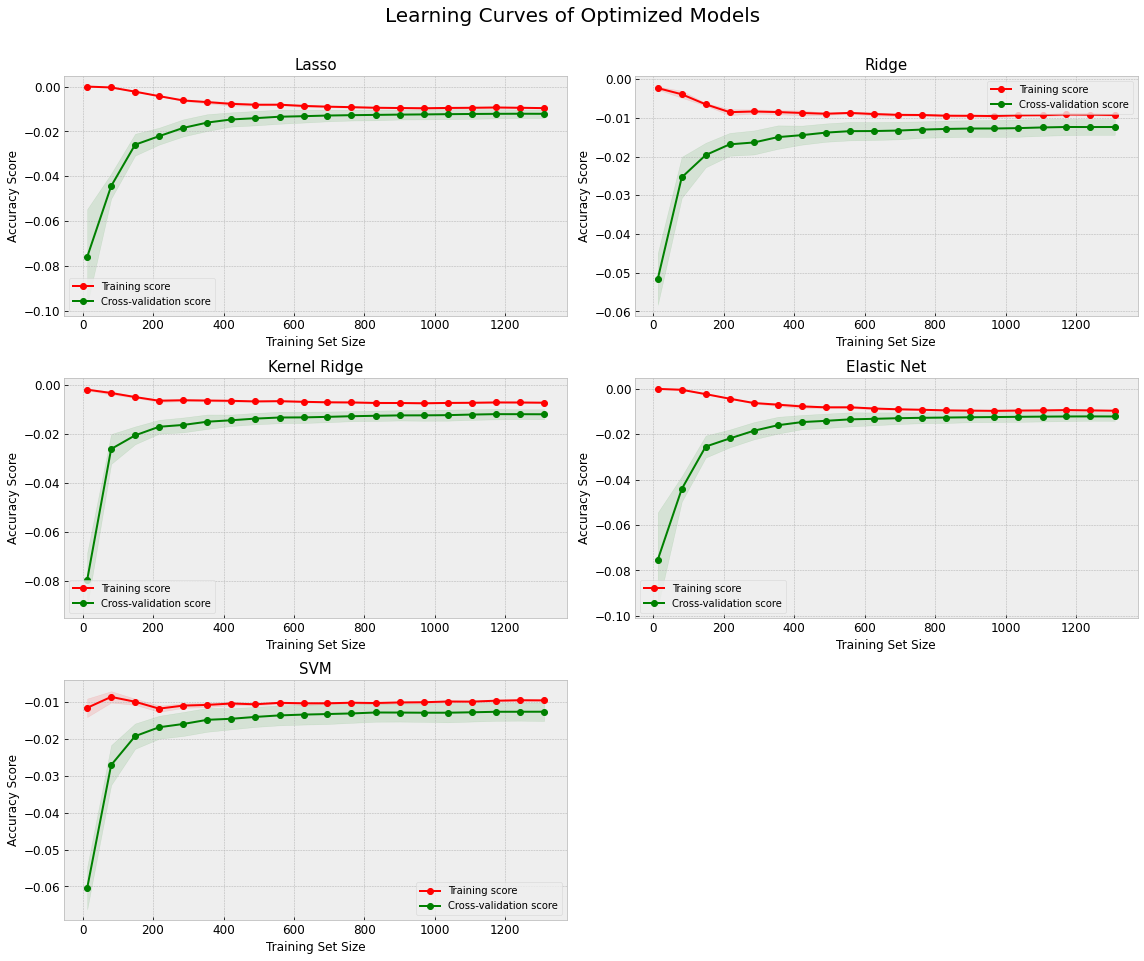

In [100]:
'''Create a function to plot learning curves.'''
def plot_learning_curve(model):
    from sklearn.model_selection import learning_curve
    
    # df_train_final is training matrix and y_train is target matrix.
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(model, df_train_final, y_train, 
                                            train_sizes = np.linspace(0.01, 1.0, 20), cv = 10, scoring = 'neg_mean_squared_error', 
                                            n_jobs = -1, random_state = seed)
    
    
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)  
    
    # Draw lines
    plt.plot(train_sizes, train_mean, 'o-', color = 'red',  label = 'Training score')
    plt.plot(train_sizes, test_mean, 'o-', color = 'green', label = 'Cross-validation score')
    
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha = 0.1, color = 'r') # Alpha controls band transparency.
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha = 0.1, color = 'g')
    
    
    # Create plot
    font_size = 12
    plt.xlabel('Training Set Size', fontsize = font_size)
    plt.ylabel('Accuracy Score', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = 'best')
    plt.grid()
'''Now plot learning curves of the optimized models in subplots.
For computational reason, I am omitting XGB, GB, and LGB.'''
plt.figure(figsize = (16,14))
lc_models = [lasso_opt, ridge_opt, kernel_ridge_opt, elastic_net_opt, svm_opt]
lc_labels = ['Lasso', 'Ridge', 'Kernel Ridge', 'Elastic Net', 'SVM']

for ax, models, labels in zip (range(1,6), lc_models, lc_labels):
    plt.subplot(3,2,ax)
    plot_learning_curve(models)
    plt.title(labels, fontsize = 15)
plt.suptitle('Learning Curves of Optimized Models', fontsize = 20)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])
